In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('./card_transdata.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [10]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


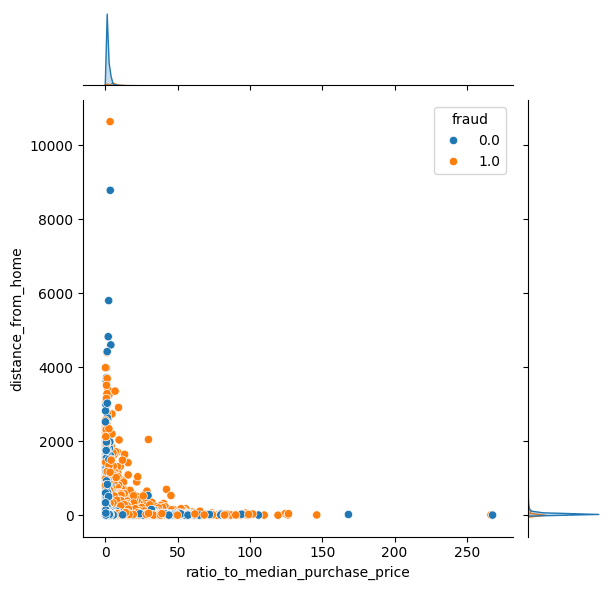

In [11]:
sns.jointplot(data=df, x='ratio_to_median_purchase_price', y='distance_from_home', hue = 'fraud')

In [13]:
df = df.loc[df['ratio_to_median_purchase_price'] <= 17]
df = df.loc[df['distance_from_home'] <= 150]
df.shape

(968756, 8)

C:\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


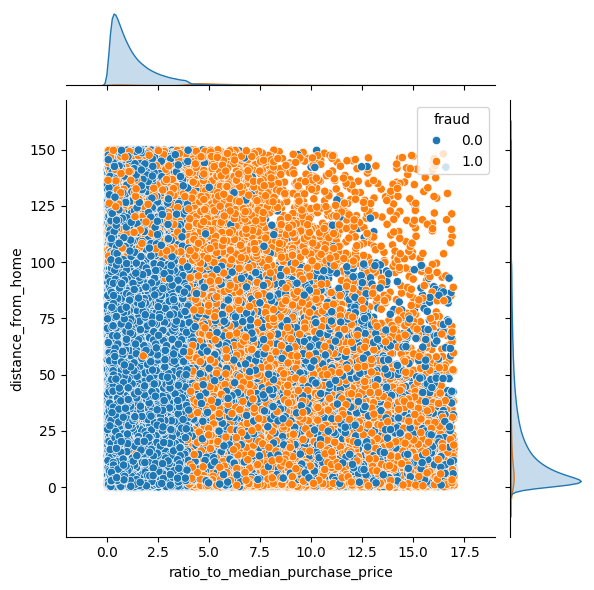

In [14]:
sns.jointplot(data=df, x='ratio_to_median_purchase_price', y='distance_from_home', hue = 'fraud')

In [16]:
X = df.drop(['fraud', 'used_chip', 'used_pin_number', 'repeat_retailer'], axis = 1)
y = df['fraud']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [22]:
pred = knn.predict(scaled_X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
print(confusion_matrix(y_test,pred))

[[265198   3946]
 [  1817  19666]]


In [26]:
print(accuracy_score(y_test,pred))

0.9801704590420023


## Choosing a K Value

In [28]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [29]:
import matplotlib.pyplot as plt

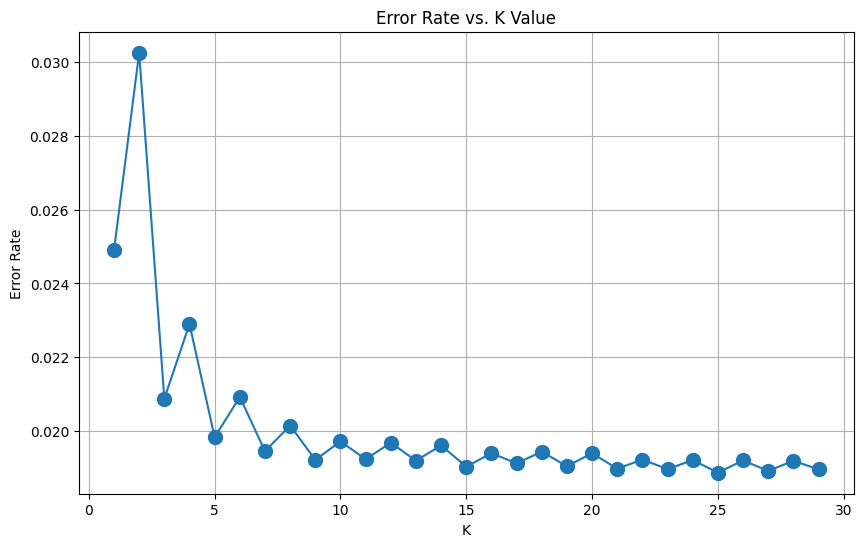

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()